In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
#from dd_nnutil_hallym_batchcrop import *

In [2]:
# tensorflow와 tf.keras를 포함한 라이브러리를 임포트합니다
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from skimage import io

In [3]:
#from nnutil_20 import random_crop
#from nnutil_20 import center_crop
from nnutil_20 import crop_generator
from nnutil_20 import GetTimeString
from nnutil_20 import MakeDir
from nnutil_20 import imshow

In [4]:
tf.__version__

'2.3.0'

### Dataset

In [5]:
#datadir = './dataset/handpose_20F_small_mini'
datadir = './dataset/handpose_20F_small_training'
datadir_val = './dataset/handpose_20F_small_100_val'

python 에서 리눅스 명령어를 사용하려면 아래처럼 ! 로 시작
```
ls --> !ls
```

리눅스 명령어에 파이썬 변수를 사용하려면 $ 를 붙이고 사용
```
datadir --> $datadir
```

In [6]:
!ls $datadir

C0  C1	C2  C3	C4  C5


In [7]:
!ls $datadir_val

C0  C1	C2  C3	C4  C5


In [8]:
MakeDir('out')

### 이미지 불러오기 Generator 설정

In [9]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

In [10]:
f = 1.1 # 그림 크기를 줄일 비율 (factor)

In [11]:
target_size=(int(300//f), int(400//f))
print(target_size)

(272, 363)


In [12]:
train_generator = train_datagen.flow_from_directory(
        datadir,
        target_size=target_size, #150,200
        batch_size=32*4, 
        shuffle=True,
        class_mode='categorical' )

Found 10989 images belonging to 6 classes.


In [13]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
val_generator = val_datagen.flow_from_directory(
        datadir_val,
        target_size=target_size,#150,200
        batch_size=16,
        class_mode='categorical')

Found 600 images belonging to 6 classes.


In [15]:
train_generator.class_indices

{'C0': 0, 'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 5}

In [16]:
n_classes = len(train_generator.class_indices)
print(n_classes)

6


### Crop generator

In [17]:
w = 224 # 줄여진 그림을 (w, w) 크기로 crop

In [18]:
train_crops = crop_generator(train_generator, w) #224
val_crops = crop_generator(val_generator, w) #224

In [19]:
#input_shape=(300//f, 400//f, 3)
#input_shape=(224, 224, 3)
input_shape=(w, w, 3)
print(input_shape)

(224, 224, 3)


In [20]:
tstring = GetTimeString()#DDUtil
print(tstring)

#x,y = train_generator.next()
x,y = next(train_crops)
print(x.shape) # (128, 100, 100, 3) = (배치갯수, h, w, 채널)
print(y.shape) # (128, 6) = (배치갯수, 클래스)

20201216_180428
(128, 224, 224, 3)
(128, 6)


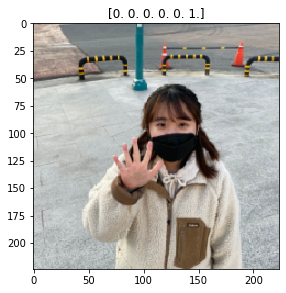

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


out/20201216_180428_0_fig.png


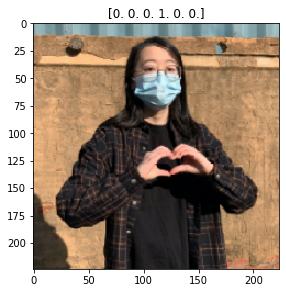

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


out/20201216_180428_1_fig.png


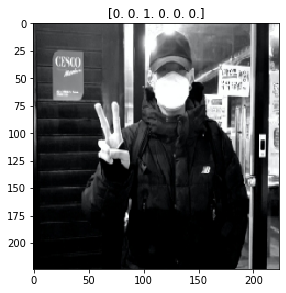

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


out/20201216_180428_2_fig.png


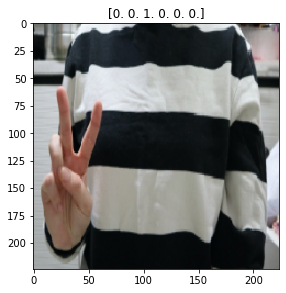

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


out/20201216_180428_3_fig.png


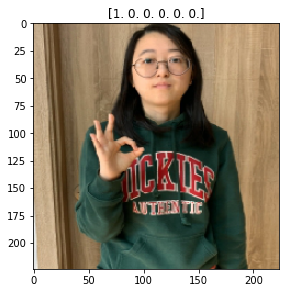

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


out/20201216_180428_4_fig.png


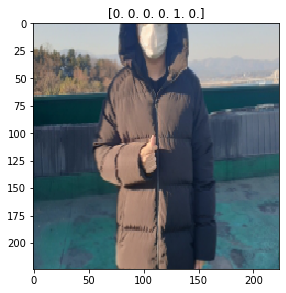

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


out/20201216_180428_5_fig.png


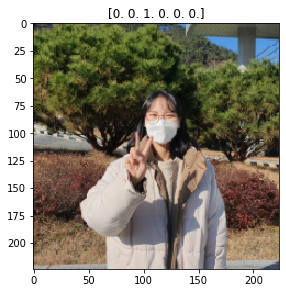

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


out/20201216_180428_6_fig.png


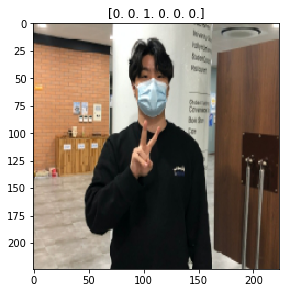

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


out/20201216_180428_7_fig.png


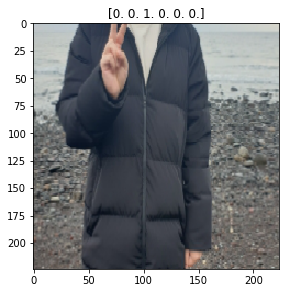

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


out/20201216_180428_8_fig.png


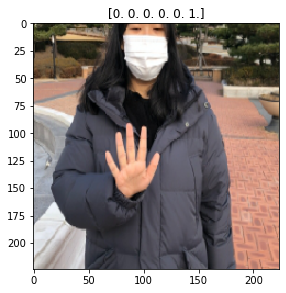

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


out/20201216_180428_9_fig.png


In [21]:
for i in range(0,10):
    image = x[i]
    f1=plt.figure()
    imshow(image, '{}'.format(y[i]))
    fnfig = 'out/{}_{}.png'.format(tstring, i)
    io.imsave(fnfig, image)
    #f1 = plt.gcf()
    fnfig = 'out/{}_{}_fig.png'.format(tstring, i)
    f1.savefig(fnfig)
    print(fnfig)
    

In [22]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    #keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(128,(3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(n_classes, activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [23]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# steps_per_epoch should be (number of training images total / batch_size) 
# validation_steps should be (number of validation images total / batch_size) 

In [25]:
#history = model.fit_generator(train_generator, steps_per_epoch = 50, epochs=50)

history = model.fit_generator(train_crops, 
                              steps_per_epoch = 50, 
                              epochs=50, 
                              validation_data=val_crops, #val_generator
                              validation_steps=50 )


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
50/50 [==============================] - 110s 2s/step - loss: 1.8165 - accuracy: 0.1800 - val_loss: 1.7836 - val_accuracy: 0.1717
Epoch 2/50
50/50 [==============================] - 112s 2s/step - loss: 1.7316 - accuracy: 0.2429 - val_loss: 1.6995 - val_accuracy: 0.2513
Epoch 3/50
50/50 [==============================] - 112s 2s/step - loss: 1.6216 - accuracy: 0.3095 - val_loss: 1.5171 - val_accuracy: 0.3648
Epoch 4/50
50/50 [==============================] - 112s 2s/step - loss: 1.4954 - accuracy: 0.3752 - val_loss: 1.3522 - val_accuracy: 0.4545
Epoch 5/50
50/50 [==============================] - 112s 2s/step - loss: 1.3478 - accuracy: 0.4548 - val_loss: 1.1595 - val_accuracy: 0.5480
Epoch 6/50
50/50 [==============================] - 112s 2s/step - loss: 1.1601 - accuracy: 0.5449 - val_loss: 1.0024 - val_accuracy: 0.5906
Epoch 7/50
50/50 [==============================] - 112s 2s/step - loss: 1.041

### 학습모델 저장하기

In [26]:
model.save('handpose_{}.h5'.format(w)) 

### 학습 과정 살펴보기

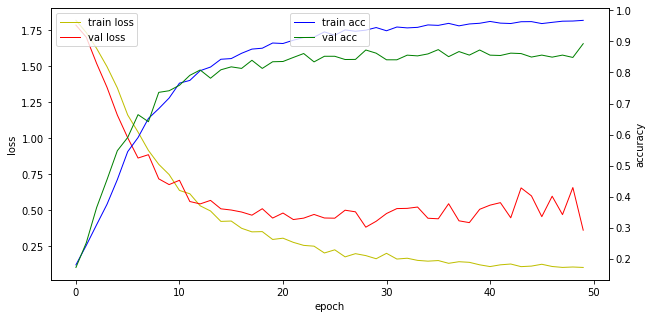

In [27]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(10,5))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss', linewidth=1)
loss_ax.plot(history.history['val_loss'], 'r', label='val loss', linewidth=1)
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc', linewidth=1)
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc', linewidth=1)
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper center')
#plt.title(cellName[celltype])

### 테스트해보기

In [64]:
test_dir = datadir_val

In [85]:
BATCH_SIZE = 10

In [86]:
eval_generator = val_datagen.flow_from_directory(
test_dir,target_size=target_size,#150,200
batch_size=BATCH_SIZE,
shuffle=False,
seed=42)
eval_crops = crop_generator(eval_generator, w) #224

Found 600 images belonging to 6 classes.


In [87]:
res = model.evaluate_generator(eval_crops,
 steps = np.ceil(len(eval_generator) / BATCH_SIZE),
 use_multiprocessing = False,
 verbose = 1,
 workers=1
 )
print('Test loss:' , res[0])
print('Test accuracy:',res[1])

6/6 [==============================] - 0s 31ms/step - loss: 0.7425 - accuracy: 0.8667
Test loss: 0.7425451874732971
Test accuracy: 0.8666666746139526


In [88]:
print('Test 정확도 : {:.2f}%'.format(res[1] * 100.0))

Test 정확도 : 86.67%


### 하나만 꺼내서 테스트 해보기

In [120]:
eval_x,eval_y = next(eval_crops)

In [121]:
eval_x.shape # (1, 100, 100, 3) = (배치갯수, h, w, 채널)
             # 이 경우 batch 갯수는 1

(10, 224, 224, 3)

In [122]:
eval_y.shape #(1, 6)

(10, 6)

In [123]:
predictions_array = model.predict(eval_x)
print(predictions_array.shape)

(10, 6)


In [124]:
max_idx = np.argmax(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함. 

In [125]:
max_prob = np.max(predictions_array[0]) #batch 를 고려해서 [0] 번째 를 명시함

Text(0.5, 1.0, 'Prediction: #1 --> 61.34%')

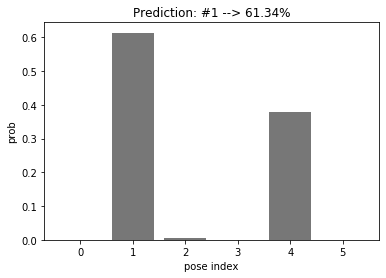

In [126]:
plt.bar(range(n_classes), predictions_array[0], color="#777777")
plt.ylabel('prob')
plt.xlabel('pose index')
plt.title('Prediction: #{} --> {:.2f}%'.format(max_idx, max_prob*100.0))

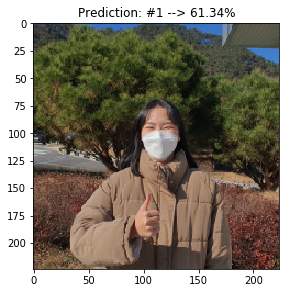

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


out/20201216_205502_eval_fig.png


In [127]:
tstring = GetTimeString()#DDUtil
image = eval_x[0]
f1=plt.figure()
imshow(image, 'Prediction: #{} --> {:.2f}%'.format(max_idx, max_prob*100.0))
fnfig = 'out/{}_eval.png'.format(tstring)
io.imsave(fnfig, image)
#f1 = plt.gcf()
fnfig = 'out/{}_eval_fig.png'.format(tstring)
f1.savefig(fnfig)
print(fnfig)